# Plot basic things

This guide is organized as follows
- Horizontal maps
- Vertical slices
- Depth profiles

In this guide we will focus on how-to plot things using AIBECS' built-in recipes for [Plots.jl](https://github.com/JuliaPlots/Plots.jl).
These recipes are implemented using [RecipesBase.jl](https://github.com/JuliaPlots/RecipesBase.jl), which are explained in [Plots.jl's documentation](https://docs.juliaplots.org/latest/recipes/).

Throughout we will use the OCIM2 grid and we will create a `dummy` tracer as a function of location to showcase each plot, just for the sake of the examples herein.

In [1]:
using AIBECS, Plots
grd, _ = OCIM2.load()
dummy = cosd.(latvec(grd))

┌ Info: You are about to use the OCIM2_CTL_He model.
│ If you use it for research, please cite:
│ 
│ - DeVries, T., & Holzer, M. (2019). Radiocarbon and helium isotope constraints on deep ocean ventilation and mantle‐³He sources. Journal of Geophysical Research: Oceans, 124, 3036–3057. https://doi.org/10.1029/2018JC014716
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
│ (Look for the "DeVries_Holzer_2019" key.)
└ @ AIBECS.OCIM2 /Users/runner/work/AIBECS.jl/AIBECS.jl/src/OCIM2.jl:114


200160-element Vector{Float64}:
 0.3221204417984906
 0.3546048870425357
 0.38666674294141884
 0.41826780077556525
 0.44937040096716135
 0.4799374779597864
 0.5099326043901359
 0.5393200344991993
 0.5680647467311559
 0.5961324854692254
 ⋮
 0.8854560256532099
 0.8688879687250066
 0.9154080085253663
 0.9009688679024191
 0.8854560256532099
 0.8688879687250066
 0.9154080085253663
 0.9009688679024191
 0.8854560256532099

## Horizontal plots

### Horizontal slice

The most common thing you plot after a simulation of marine tracers is a horizontal slice.
In this case, you just need to provide the tracer (`dummy` here), the grid object `grd`, and the depth at which you want to plot.

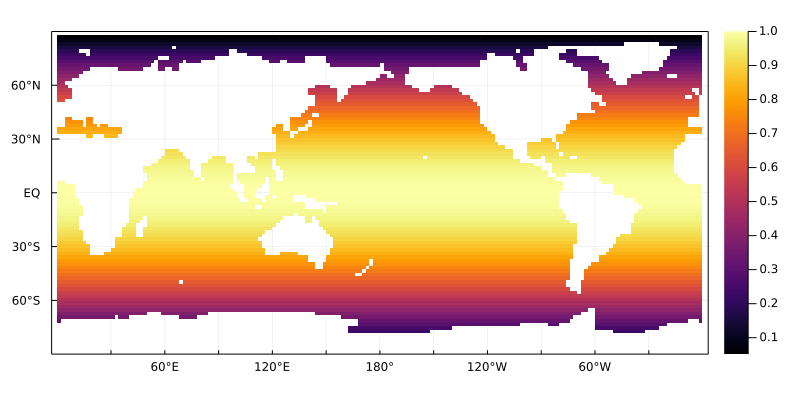

In [2]:
plothorizontalslice(dummy, grd, depth=10)

You can supply units for the depth at which you want to see the horizontal slice.

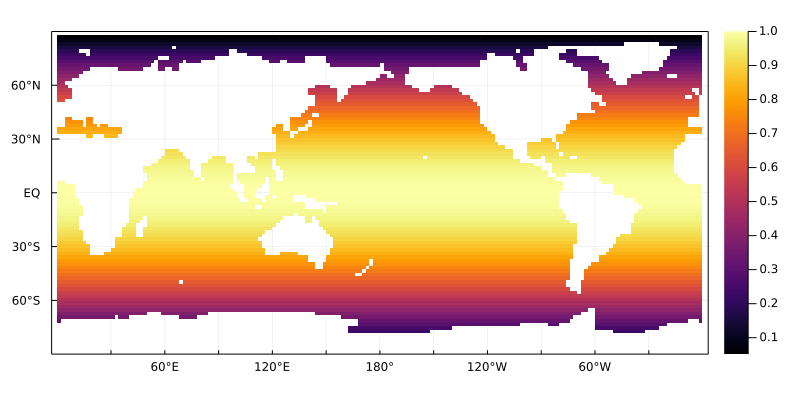

In [3]:
plothorizontalslice(dummy, grd, depth=10u"m")

And the units should be understood under the hood.

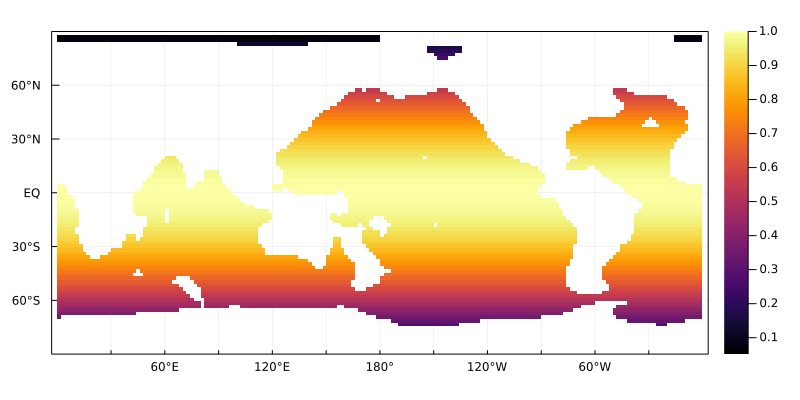

In [4]:
plothorizontalslice(dummy, grd, depth=3u"km")

If your tracer is supplied with units, those will show in the colorbar label

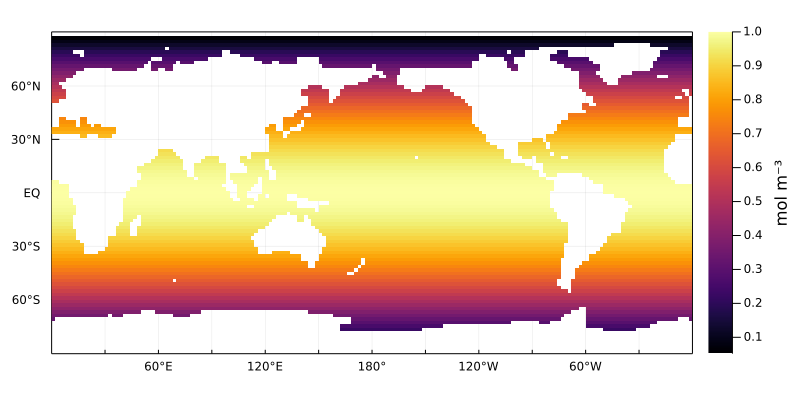

In [5]:
plothorizontalslice(dummy * u"mol/m^3", grd, depth=10u"m")

The advantage of Plots.jl recipes like this one is that you can specify other pieces of the plot as you would with built-in functions.
The advantage of Plots.jl recipes like this one is that you can specify other pieces of the plot as you would with built-in functions.
For example, you can chose the colormap with the `color` keyword argument.

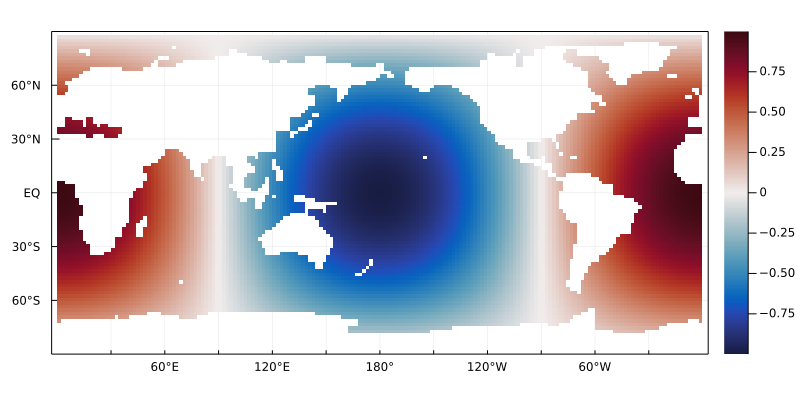

In [6]:
dummy .*= cosd.(lonvec(grd))
plt = plothorizontalslice(dummy, grd, depth=100, color=:balance)

And you can finetune attributes after the plot is created.

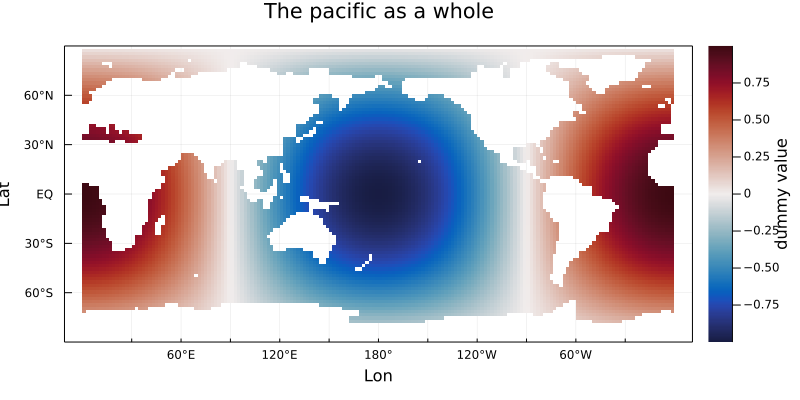

In [7]:
plot!(plt, xlabel="Lon", ylabel="Lat", colorbar_title="dummy value", title="The pacific as a whole")

## Vertical plots

Exploring the vertical distribution of tracers is important after all.

### Zonal slices

You must specify the longitude

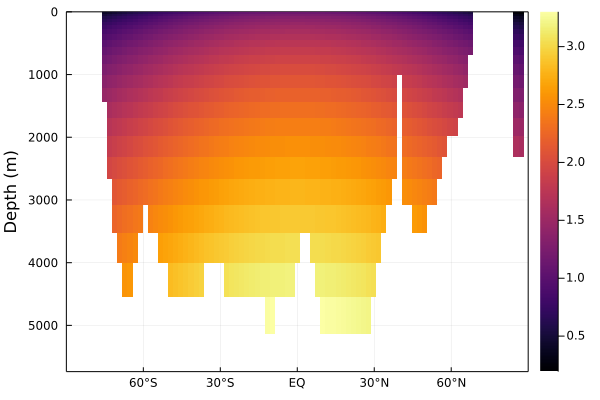

In [8]:
dummy = cosd.(latvec(grd))
dummy .+= sqrt.(depthvec(grd)) / 30
plotmeridionalslice(dummy, grd, lon=330)

### Zonal averages

#### Global zonal average

In [9]:
zonalaverage(dummy, grd)

91×24 Matrix{Float64}:
 NaN         NaN         NaN         …  NaN        NaN        NaN  NaN  NaN
 NaN         NaN         NaN            NaN        NaN        NaN  NaN  NaN
 NaN         NaN         NaN            NaN        NaN        NaN  NaN  NaN
 NaN         NaN         NaN            NaN        NaN        NaN  NaN  NaN
 NaN         NaN         NaN            NaN        NaN        NaN  NaN  NaN
 NaN         NaN         NaN         …  NaN        NaN        NaN  NaN  NaN
   0.364207    0.469204    0.545227     NaN        NaN        NaN  NaN  NaN
   0.397726    0.502722    0.578745     NaN        NaN        NaN  NaN  NaN
   0.430939    0.535935    0.611958       2.2012   NaN        NaN  NaN  NaN
   0.463807    0.568804    0.644827       2.23407    2.36494  NaN  NaN  NaN
   ⋮                                 ⋱               ⋮                  
   0.430939    0.535935    0.611958     NaN        NaN        NaN  NaN  NaN
   0.397726    0.502722    0.578745     NaN        NaN        NaN  N

If you want a zonal average over a specific region, you can just mask it out

#### Basin zonal average

This is experimental at this stage and relies on [OceanBasins.jl](https://github.com/briochemc/OceanBasins.jl).
You can create basin masks using this package with

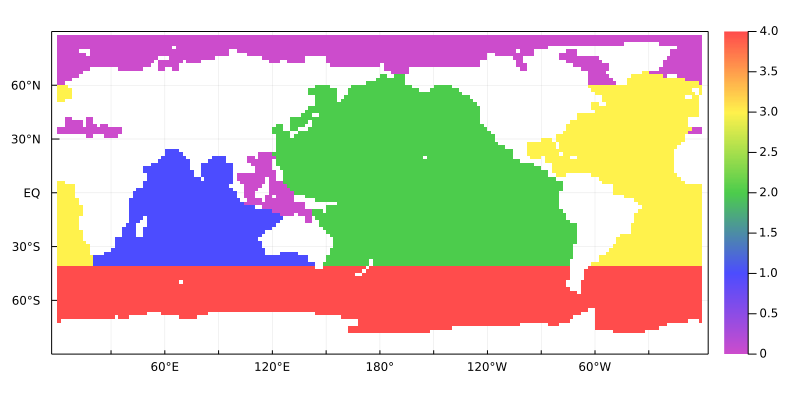

In [10]:
using OceanBasins
OCEANS = oceanpolygons()
basins = sum(i*isbasin(latvec(grd), lonvec(grd), OCEANS) for (i,isbasin) in enumerate([isindian2, ispacific2, isatlantic2, isantarctic]))
plothorizontalslice(basins, grd, depth=0, seriestype=:heatmap, color=:lightrainbow)

and you can mask a specific region with the `mask` keyword argument

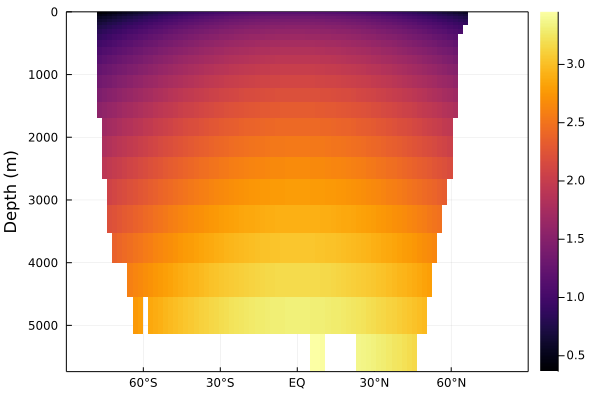

In [11]:
mPAC = ispacific(latvec(grd), lonvec(grd), OCEANS)
plotzonalaverage(dummy, grd, mask=mPAC)

### Meridional slices

Just as you should expect at this stage, you can plot a meridional slice with

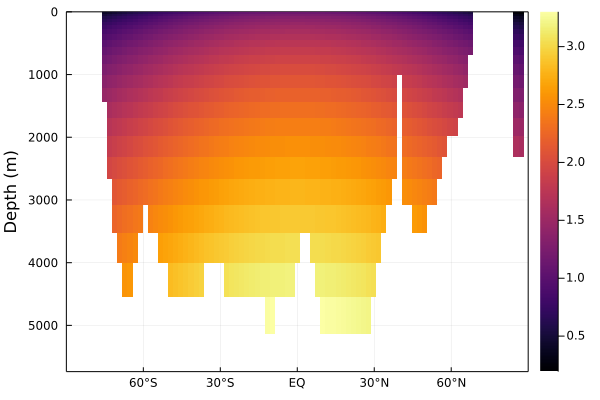

In [12]:
plotmeridionalslice(dummy, grd, lon=-30)

## Depth profiles

Sometimes you want a profile at a given station or location

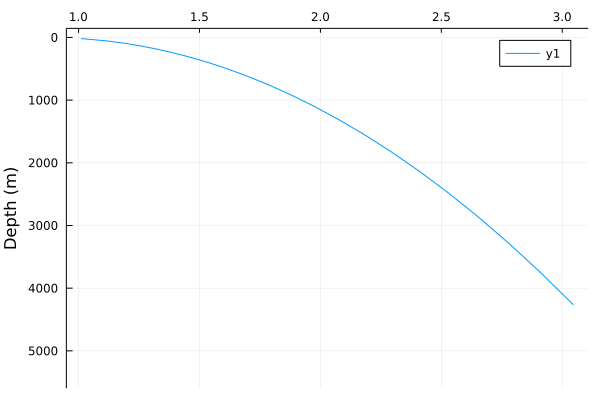

In [13]:
plotdepthprofile(dummy, grd, lonlat=(-30,30))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*